In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [3]:


#Read the data
cars = pd.read_csv("Cars.csv")
cars.head()



,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


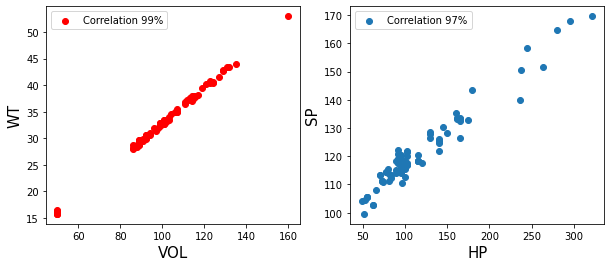

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(cars["VOL"],cars["WT"],color="red",label="Correlation 99%")
plt.xlabel("VOL",size=15)
plt.ylabel("WT",size=15)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(cars["HP"],cars["SP"],label="Correlation 97%")
plt.xlabel("HP",size=15)
plt.ylabel("SP",size=15)
plt.legend(loc="best")

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

<AxesSubplot:>

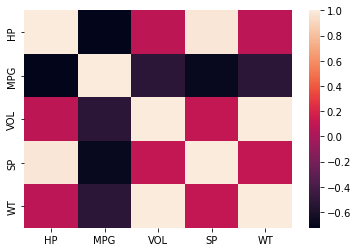

In [7]:
sns.heatmap(cars.corr())

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

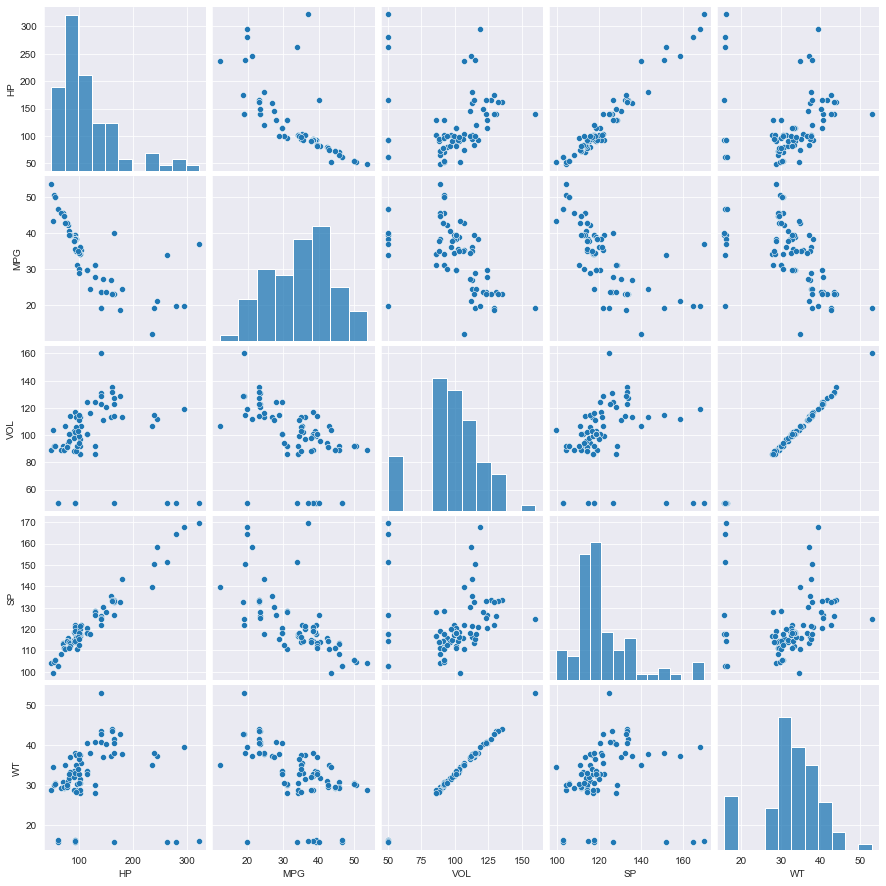

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [10]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [11]:
model.rsquared

0.7705372737359844

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.54e-23
Time:                        07:37:45   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ypred =a1x1+a2x2+a3x3+a4x4+b

ho:a1=0    ===> 0.814 
h1:a1!=0  

SyntaxError: invalid syntax (3528283069.py, line 3)

In [ ]:
#Coefficients
model.params

In [ ]:
#t and p-Values
#print(model.tvalues, '\n', model.pvalues)

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

# Calculating VIF

In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 19

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 625

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  624

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  20

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

'''


x1,x2,x3,x4

x2,x3 high VIF

X1,X4 LOW vif 

-->x2,X1,X4

-->x3,X1,X4

'''

'''
{x1,x2,x3,x4,x5}

VIF is high -->{x1,x2,x3}

VIF is low -->{x4,x5}

-->x1,x4,x5
-->x2,x4,x5
-->x3,x4,x5
-->x1,x2,x4,x5
-->x1,x3,x4,x5
-->x2,x3,x4,x5
-->x4,x5


pvalue should be on the lower side and we should have r**2 high

'''

# treatment for multicollinearity 

In [14]:
import statsmodels.formula.api as smf 
model = smf.ols('MPG~VOL+HP',data=cars).fit()

#MPG~VOL+HP
#MPG~WT+HP
#MPG~VOL+SP
#MPG~WT+SP

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.98e-24
Time:                        07:37:45   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Analysis

In [16]:
#excel --> df. ---> csv 

## Test for Normality of Residuals (Q-Q Plot)

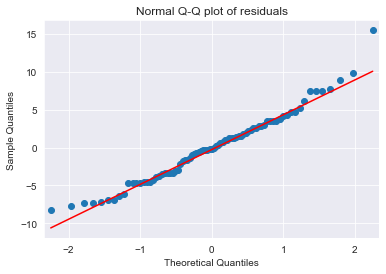

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

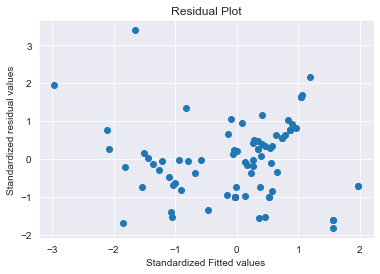

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [20]:
# plt.scatter(get_standardized_values(cars.MPG),
#             get_standardized_values(model.resid))

# plt.title('Residual Plot')
# plt.xlabel('Standardized Actual values')
# plt.ylabel('Standardized residual values')
# plt.show()

## Residual Vs Regressors

eval_env: 1


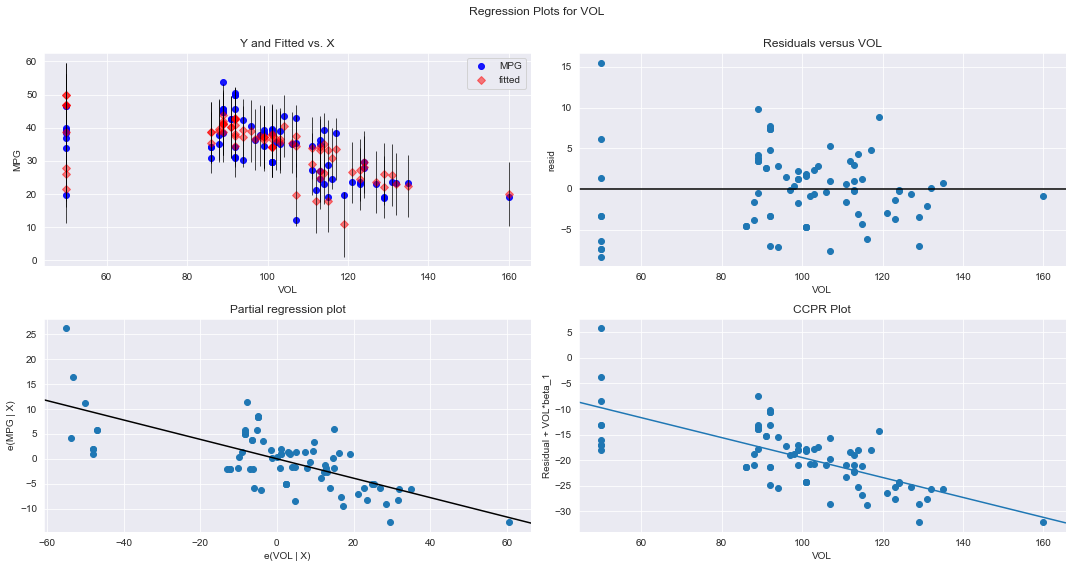

In [21]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()


eval_env: 1


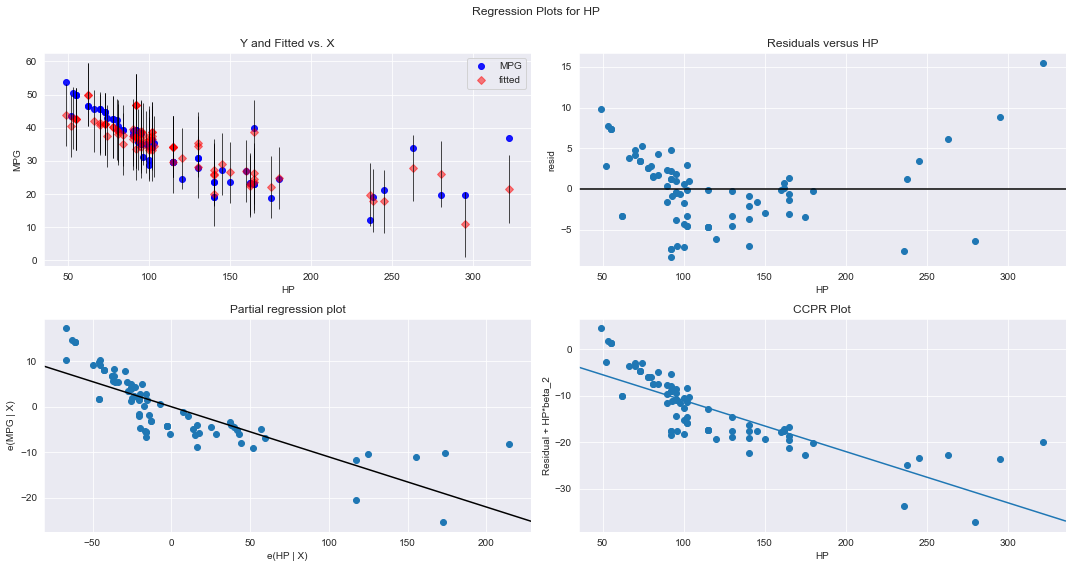

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.98e-24
Time:                        07:37:49   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [25]:
K=2
N=81
3*(K+1)/N

0.1111111111111111

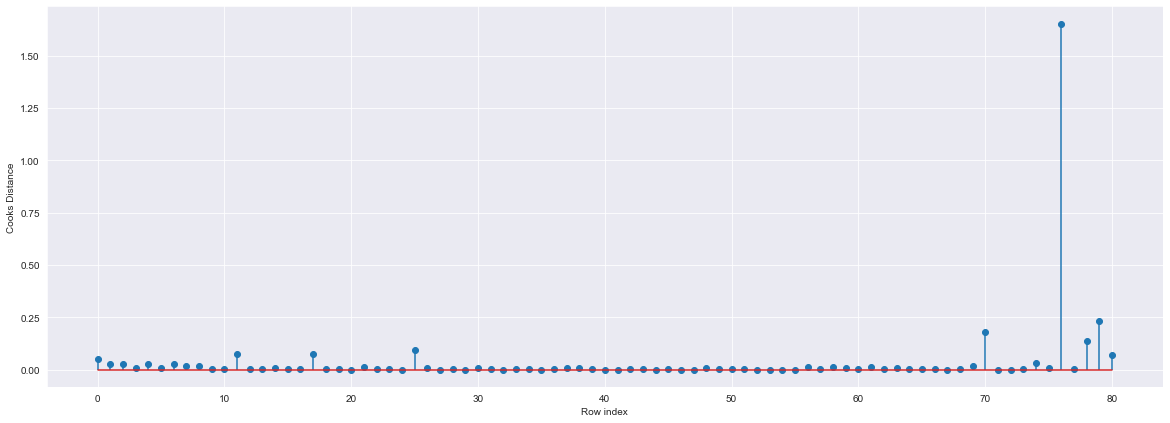

In [26]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(76, 1.6544147314575575)

In [28]:
np.where(c>0.1111)

(array([70, 76, 78, 79]),)

# Improving the model

In [29]:
#Load the data
cars_new = pd.read_csv("Cars.csv")

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76,78,79]],axis=0).reset_index()

In [31]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [32]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


# Build Model

In [33]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~HP+VOL',data = car1).fit()

In [34]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8438644043815174, 419.7431711665409)

In [35]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.44e-30
Time:                        07:37:53   Log-Likelihood:                -206.87
No. Observations:                  77   AIC:                             419.7
Df Residuals:                      74   BIC:                             426.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0632      2.080     31.287      0.000      60.920      69.207
HP            -0.1613      0.011    -14.422      0.000      -0.184      -0.139
VOL           -0.1273      0.023     -5.567      0.000      -0.173      -0.082
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.357
Skew:                           0.322   Prob(JB):                        0.507
Kurtosis:                       3.097   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
final_ml_V.predict(car1[["HP","VOL"]])

0     45.828785
1     44.478856
2     44.478856
3     42.058680
4     44.801546
        ...    
72    22.109050
73    26.054928
74    20.407850
75    12.025121
76    13.366102
Length: 77, dtype: float64

# pca

In [1]:
import seaborn as sns
import numpy as np

In [2]:
data =sns.load_dataset("iris")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x=data.iloc[:,:-1]

In [5]:
x.shape

(150, 4)

In [6]:
square_matrix=np.matmul(x.T,x)

/var/folders/ff/ptty9lqj7ns37pnh44q4g4t40000gn/T/ipykernel_53296/2808061707.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  square_matrix=np.matmul(x.T,x)


In [7]:
square_matrix.shape

(4, 4)

In [8]:
np.linalg.eigh(square_matrix)

(array([3.55257020e+00, 1.19780429e+01, 3.15454317e+02, 9.20830507e+03]),
 array([[ 0.32081425,  0.50215472,  0.2841749 , -0.75110816],
        [-0.31725607, -0.67524332,  0.5467445 , -0.38008617],
        [-0.48074507, -0.05916621, -0.70866455, -0.51300886],
        [ 0.75187165, -0.53701625, -0.34367081, -0.16790754]]))

In [9]:
v1=np.linalg.eigh(square_matrix)[1][:,3]
v2=np.linalg.eigh(square_matrix)[1][:,2]
v3=np.linalg.eigh(square_matrix)[1][:,1]
v4=np.linalg.eigh(square_matrix)[1][:,0]

In [13]:
new_data=np.matmul(x,np.linalg.eigh(square_matrix)[1][:,::-1])

In [14]:
new_data.columns=["pc1","pc2","pc3","pc4"]

In [15]:
new_data

,pc1,pc2,pc3,pc4
0,-5.912747,2.302033,0.007402,0.003088
1,-5.572482,1.971826,0.244592,0.097553
2,-5.446977,2.095206,0.015029,0.018013
3,-5.436459,1.870382,0.020505,-0.078492
4,-5.875645,2.328290,-0.110338,-0.060719
...,...,...,...,...
145,-9.226517,-0.931293,-0.204095,0.427118
146,-8.566265,-1.039134,0.159305,0.252820
147,-9.025923,-0.885027,-0.143421,0.137393
148,-9.105599,-0.996416,-0.737103,0.043659


In [16]:
new_data["species"]=data["species"]

In [17]:
new_data

,pc1,pc2,pc3,pc4,species
0,-5.912747,2.302033,0.007402,0.003088,setosa
1,-5.572482,1.971826,0.244592,0.097553,setosa
2,-5.446977,2.095206,0.015029,0.018013,setosa
3,-5.436459,1.870382,0.020505,-0.078492,setosa
4,-5.875645,2.328290,-0.110338,-0.060719,setosa
...,...,...,...,...,...
145,-9.226517,-0.931293,-0.204095,0.427118,virginica
146,-8.566265,-1.039134,0.159305,0.252820,virginica
147,-9.025923,-0.885027,-0.143421,0.137393,virginica
148,-9.105599,-0.996416,-0.737103,0.043659,virginica


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [24]:
model=LogisticRegression()
model.fit(new_data[["pc1","pc2"]],new_data["species"])

LogisticRegression()

In [26]:
print(classification_report(new_data["species"],model.predict(new_data[["pc1","pc2"]])))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# plot

In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder=LabelEncoder()
encoder.fit_transform(new_data["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

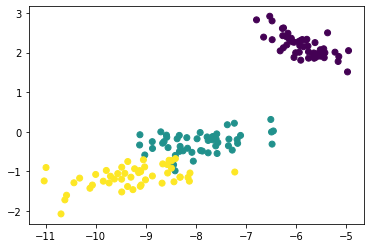

In [36]:
plt.scatter(new_data.pc1,new_data.pc2,c=encoder.fit_transform(new_data["species"]))